# Crypto Sentiment Analysis

---


In [1]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
from pathlib import Path
from newsapi import NewsApiClient

import nltk as nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

%matplotlib inline

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\bradl\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


## 1. Sentiment Analysis

Use the [newsapi](https://newsapi.org/) to pull the latest news articles for Bitcoin and Ethereum and create a DataFrame of sentiment scores for each coin.

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [2]:
# Read your api key environment variable
load_dotenv("MY_KEYS.env")
api_key = os.getenv("NEWS_API_KEY")
type(api_key)

str

In [3]:
# Create a newsapi client
newsapi = NewsApiClient(api_key=api_key)

In [4]:
# Fetch the latest Bitcoin news articles - the last 100 articles from the last three days were selected for analysis because any more than that requires a paid plan with NewsAPI
btc_news = newsapi.get_everything(
    q="bitcoin",
    language="en",
    from_param="2021-12-17",
    page_size=100
)

print(f"Total articles about Bitcoin: {btc_news['totalResults']}")

Total articles about Bitcoin: 1329


In [5]:
# Fetch the latest Ethereum news articles - the last 100 articles from the last three days were selected for analysis because any more than that requires a paid plan with NewsAPI
eth_news = newsapi.get_everything(
    q="ethereum",
    language="en",
    from_param="2021-12-17",
    page_size=100
)

print(f"Total articles about Ethereum: {eth_news['totalResults']}")

Total articles about Ethereum: 563


In [48]:
# Create a new empty list and function to pull the Bitcoin sentiment scores
btc_sentiments = []

for article in btc_news["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        btc_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass
    
# Create Bitcoin sentiments DataFrame
btc_sentiments_df = pd.DataFrame(btc_sentiments)

# Reorder DataFrame columns
cols = ["date", "text", "compound", "positive", "negative", "neutral"]
btc_sentiments_df = btc_sentiments_df[cols]

# Preview the Bitcoin sentiments DataFrame
btc_sentiments_df.head()

,date,text,compound,positive,negative,neutral
0,2021-12-17,"MEXICO CITY, Dec 17 (Reuters) - Mexico's Grupo...",0.7906,0.211,0.0,0.789
1,2021-12-23,Latin America is fast becoming the worlds mode...,0.0000,0.000,0.0,1.000
2,2021-12-17,The news: US-based crypto technology firm NYDI...,0.0000,0.000,0.0,1.000
3,2021-12-20,"Representations of cryptocurrencies Bitcoin, E...",0.0000,0.000,0.0,1.000
4,2021-12-20,"Sen. Cynthia Lummis, a Republican from Wyoming...",0.0000,0.000,0.0,1.000


In [7]:
# Create a new empty list and function to pull the Ethereum sentiment scores
eth_sentiments = []

for article in eth_news["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        eth_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass
    
# Create Ethereum sentiments DataFrame
eth_sentiments_df = pd.DataFrame(eth_sentiments)

# Reorder DataFrame columns
cols = ["date", "text", "compound", "positive", "negative", "neutral"]
eth_sentiments_df = eth_sentiments_df[cols]

# Preview the Ethereum sentiments DataFrame
eth_sentiments_df.head()

,date,text,compound,positive,negative,neutral
0,2021-12-20,"Representations of cryptocurrencies Bitcoin, E...",0.0000,0.000,0.000,1.000
1,2021-12-20,"When Ethereum first launched, it wanted to be ...",0.5267,0.132,0.000,0.868
2,2021-12-21,"Web3, the still hazy term for blockchain-based...",0.0000,0.000,0.000,1.000
3,2021-12-21,South Park reveals the truth about NFTs. And i...,0.3818,0.125,0.059,0.816
4,2021-12-17,Do you want to use your cryptocurrency holding...,-0.2176,0.129,0.111,0.760


In [8]:
# Describe the Bitcoin Sentiment
btc_sentiments_df.describe()

,compound,positive,negative,neutral
count,100.000000,100.000000,100.000000,100.000000
mean,0.147746,0.071160,0.036750,0.892060
std,0.403907,0.070433,0.049024,0.080022
min,-0.654200,0.000000,0.000000,0.692000
25%,-0.058000,0.000000,0.000000,0.852000
50%,0.102600,0.068500,0.000000,0.888500
75%,0.493900,0.121250,0.067500,0.942250
max,0.906000,0.291000,0.147000,1.000000


In [37]:
# Describe the Ethereum Sentiment
eth_sentiments_df.describe()

,compound,positive,negative,neutral
count,100.000000,100.000000,100.000000,100.000000
mean,0.268246,0.088880,0.022010,0.889140
std,0.350952,0.078426,0.045059,0.093514
min,-0.612400,0.000000,0.000000,0.605000
25%,0.000000,0.000000,0.000000,0.834500
50%,0.284600,0.091500,0.000000,0.888500
75%,0.558300,0.133500,0.000000,1.000000
max,0.951700,0.395000,0.210000,1.000000


### Questions:

Q: Which coin had the highest mean positive score?

A: Ethereum had the higher positive score on average than Bitcoin for the latest 100 news articles.

Q: Which coin had the highest compound score?

A: Ethereum also had not only the higher compound score on average than Bitcoin, but Ethereum also had the highest overall compound score for the latest 100 news articles. 

Q. Which coin had the highest positive score?

A: Ethereum had the highest overall positive score than Bitcoin for the latest 100 news articles.

---

## 2. Natural Language Processing
---
###   Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word.
2. Remove Punctuation.
3. Remove Stopwords.

In [150]:
# Initial imports
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [171]:
# Instantiate the lemmatizer
lemmatizer = WordNetLemmatizer()

# Create a list of stopwords
sw = set(stopwords.words('english'))

# Add stopwords to the default list
sw_addon = {
    "Reuters",
    "reuters",
    "Getty Images",
    "Getty",
    "AP",
    "Dec",
    "Nov",
    "char",
    "ha",
    "day",
    "dec",
    "wa",
    "charswhat"
}
print(sw.union(sw_addon))

{'being', 'Reuters', 'after', 'm', "shouldn't", 'was', "shan't", 'their', "you're", 'a', 'these', 'against', 'other', 'below', 'y', 'hasn', 'ourselves', 'by', "you've", 'down', 'ain', 'does', 'here', "wouldn't", 'its', 'day', 'having', "mustn't", 'you', 'ma', 'all', 'been', 'why', "mightn't", 'some', 'd', 'to', 'it', 'should', 'if', "it's", "hasn't", 'into', 'is', 'isn', 've', "should've", 'now', 'where', 'no', 'doesn', 'hers', 'between', 'itself', 'over', 'any', 'yours', 'off', 'an', 'in', 'under', 'i', 'they', 'how', 'too', 'o', "hadn't", 'shouldn', 'Getty', "wasn't", 'because', 'did', 'Getty Images', 'had', 'that', 'wasn', 'char', 'more', 'dec', 'haven', 'yourself', "won't", "aren't", 'or', "haven't", 'will', 'there', 'he', 'won', 't', 'couldn', 'again', 'further', 'own', 'AP', "needn't", 'shan', 'she', 'my', 'which', 'very', 'during', 'same', 'until', 'be', "weren't", 'himself', 'only', 'themselves', 'about', 'your', 's', 'll', 'myself', 'of', 'reuters', 'ours', 'with', 'most', 'we

In [172]:
# Create the tokenizer function, and combine the tokens into a string (i.e., no list seprated by quotes) at the end
def tokenizer(text):
    """Tokenizes text."""
    
    # Remove the punctuation from text
    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub('', text)   

    # Create a tokenized list of the words
    words = word_tokenize(re_clean)    
    
    # Lemmatize words into root words
    lem = [lemmatizer.lemmatize(word) for word in words]
   
    # Convert the words to lowercase
    lower = [word.lower() for word in lem]
    
    # Remove the stop words
    tokens = [word for word in lower if word not in sw.union(sw_addon)]
    
    return tokens

In [173]:
# Tokenize the Bitcoin articles and save them in a new column of the dataframe
btc_sentiments_df["tokens"] = btc_sentiments_df.text.apply(tokenizer)
btc_sentiments_df.head()

,date,text,compound,positive,negative,neutral,tokens
0,2021-12-17,"MEXICO CITY, Dec 17 (Reuters) - Mexico's Grupo...",0.7906,0.211,0.0,0.789,"[mexico, city, mexicos, grupo, elektra, accept..."
1,2021-12-23,Latin America is fast becoming the worlds mode...,0.0000,0.000,0.0,1.000,"[latin, america, fast, becoming, world, model,..."
2,2021-12-17,The news: US-based crypto technology firm NYDI...,0.0000,0.000,0.0,1.000,"[newsusbased, crypto, technology, firmnydig, n..."
3,2021-12-20,"Representations of cryptocurrencies Bitcoin, E...",0.0000,0.000,0.0,1.000,"[representations, cryptocurrencies, bitcoin, e..."
4,2021-12-20,"Sen. Cynthia Lummis, a Republican from Wyoming...",0.0000,0.000,0.0,1.000,"[sen, cynthia, lummis, republican, wyomingstef..."


In [174]:
# Tokenize the Ethereum articles and save them in a new column of the dataframe
eth_sentiments_df["tokens"] = eth_sentiments_df.text.apply(tokenizer)
eth_sentiments_df.head()

,date,text,compound,positive,negative,neutral,tokens
0,2021-12-20,"Representations of cryptocurrencies Bitcoin, E...",0.0000,0.000,0.000,1.000,"[representations, cryptocurrencies, bitcoin, e..."
1,2021-12-20,"When Ethereum first launched, it wanted to be ...",0.5267,0.132,0.000,0.868,"[ethereum, first, launched, wanted, heart, tru..."
2,2021-12-21,"Web3, the still hazy term for blockchain-based...",0.0000,0.000,0.000,1.000,"[web, still, hazy, term, blockchainbased, dece..."
3,2021-12-21,South Park reveals the truth about NFTs. And i...,0.3818,0.125,0.059,0.816,"[south, park, reveals, truth, nfts, still, con..."
4,2021-12-17,Do you want to use your cryptocurrency holding...,-0.2176,0.129,0.111,0.760,"[want, use, cryptocurrency, holding, pay, good..."


---

### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [175]:
from collections import Counter
from nltk import ngrams

In [176]:
# Generate the Bitcoin N-grams where n=2 (need to use the original text, not the lemmatized version, and convert it to a string since it's an object
btc_bigram_counts = (ngrams(tokenizer(btc_sentiments_df["text"].str.cat()), n=2))
Counter(btc_bigram_counts).most_common(10)

[(('trading', 'session'), 10),
 (('latest', 'trading'), 9),
 (('marking', 'move'), 9),
 (('per', 'share'), 9),
 (('us', 'dollar'), 8),
 (('narrower', 'sampp'), 7),
 (('charsin', 'latest'), 6),
 (('closed', 'marking'), 6),
 (('move', 'previous'), 6),
 (('sampp', 'daily'), 6)]

In [177]:
# Generate the Ethereum N-grams where n=2 (need to use the original text, not the lemmatized version, and convert it to a string since it's an object)
eth_bigram_counts = (ngrams(tokenizer(eth_sentiments_df["text"].str.cat()), n=2))
Counter(eth_bigram_counts).most_common(10)

[(('cryptocurrency', 'market'), 7),
 (('crypto', 'market'), 6),
 (('jack', 'dorsey'), 5),
 (('bitcoin', 'ethereum'), 3),
 (('nonfungible', 'token'), 3),
 (('past', 'year'), 3),
 (('cryptocurrency', 'investor'), 3),
 (('aggregate', 'value'), 3),
 (('value', 'digital'), 3),
 (('cryptocurrency', 'community'), 3)]

In [178]:
# Function token_count generates the top 10 words for a given coin using the original text
def token_count(tokens, n):
    """Returns the top N tokens from the frequency count"""    
    return Counter(tokens).most_common(n)

In [179]:
# Use token_count to get the top 10 words for Bitcoin
dict(token_count(tokenizer(btc_sentiments_df["text"].str.cat()), n=10))

{'dollar': 20,
 'stock': 18,
 'share': 17,
 'trading': 16,
 'loss': 15,
 'year': 14,
 'move': 14,
 'market': 14,
 'bitcoin': 13,
 'us': 13}

In [180]:
# Use token_count to get the top 10 words for Ethereum
dict(token_count(tokenizer(eth_sentiments_df["text"].str.cat()), n=10))

{'cryptocurrency': 27,
 'year': 22,
 'market': 21,
 'cryptocurrencies': 19,
 'crypto': 18,
 'ethereum': 16,
 'bitcoin': 14,
 'token': 12,
 'blockchain': 11,
 'trading': 11}

---

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [23]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

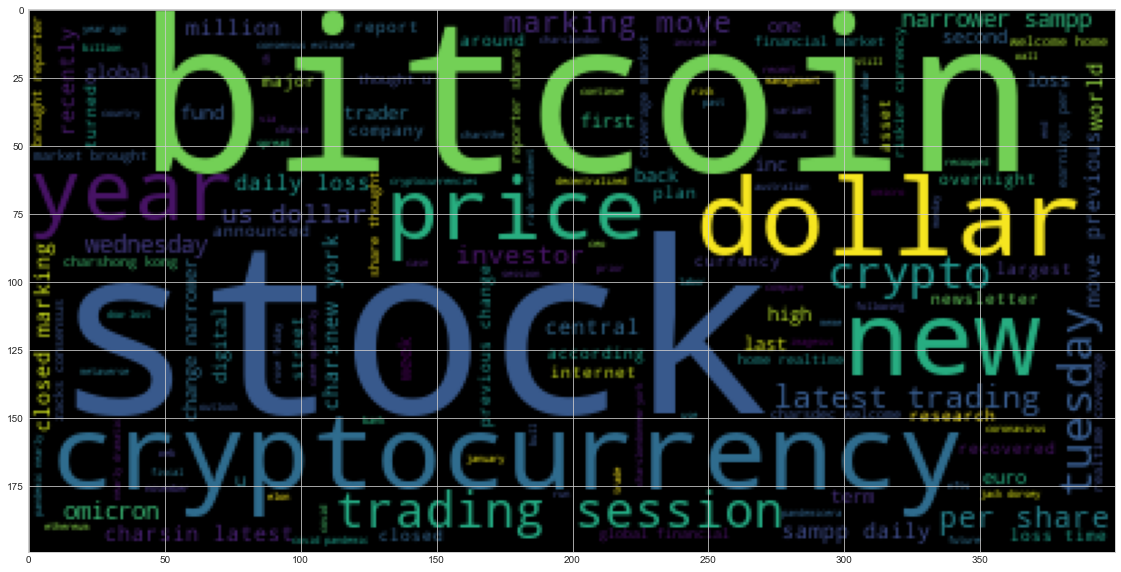

In [195]:
# Create a string of all tokens for Bitcoin
btc_tokenized = tokenizer(btc_sentiments_df["text"].str.cat())
btc_tokenized_str = ' '.join(btc_tokenized)

# Generate the Bitcoin word cloud
btc_wc = WordCloud().generate(btc_tokenized_str)
plt.imshow(btc_wc)

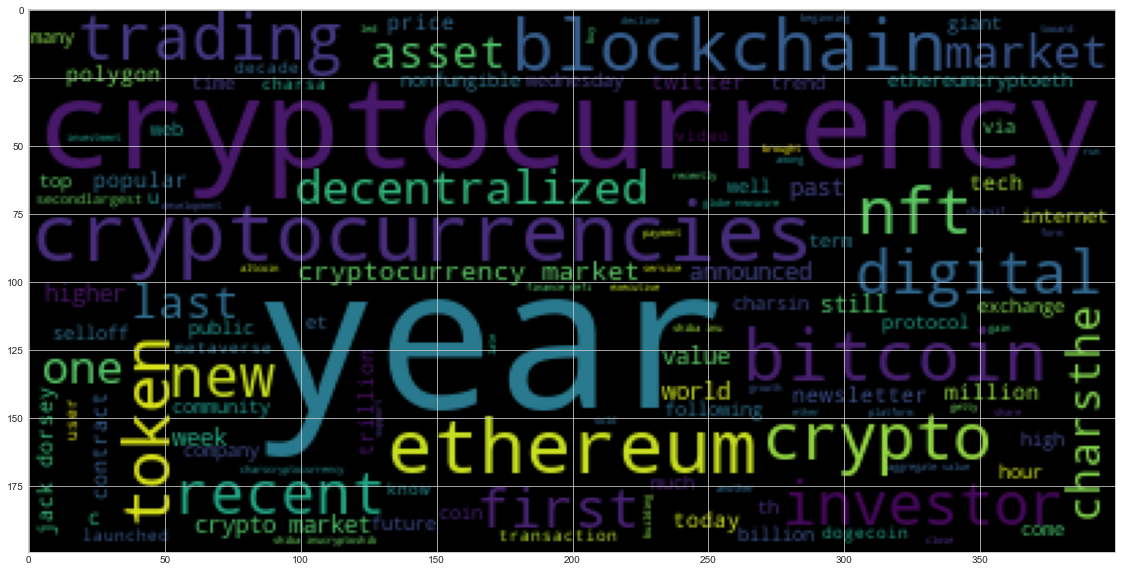

In [196]:
# Create a string of all tokens for Ethereum
eth_tokenized = tokenizer(eth_sentiments_df["text"].str.cat())
eth_tokenized_str = ' '.join(eth_tokenized)

# Generate the Ethereum word cloud
eth_wc = WordCloud().generate(eth_tokenized_str)
plt.imshow(eth_wc)

---
## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [26]:
import spacy
from spacy import displacy

In [27]:
# Download the language model for SpaCy
# !python -m spacy download en_core_web_sm

In [28]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

---
### Bitcoin NER

In [103]:
# Concatenate all of the original Bitcoin text together
btc_tokenized = btc_sentiments_df["text"].str.cat()

In [104]:
# Set article to be analyzed with spaCy
btc_doc = nlp(btc_tokenized)

# Add a title to the document
btc_doc.user_data["title"] = "Bitcoin Named Entity Recognition"

In [105]:
# Render the visualization
displacy.render(btc_doc, style='ent')

In [106]:
# List all Entities
for ent in btc_doc.ents:
    print(ent.text, ent.label_)

MEXICO CITY GPE
Dec 17 DATE
Reuters ORG
Mexico GPE
Grupo Elektra ORG
Latin America LOC
Ele PERSON
America GPE
years DATE
El Salvador GPE
US GPE
$1 billion MONEY
Bitcoin, Ethereum ORG
DogeCoin ORG
June 29, 2021 DATE
REUTERS ORG
Dado Ruvic/File Photo PERSON
DUBAI ORG
Cynthia Lummis PERSON
Republican NORP
Wyoming GPE
Stefani Reynolds/Pool PERSON
REUTERS ORG
Cynthia Lummis PERSON
Pat Toomey PERSON
two CARDINAL
US GPE
Chris McGrath/Getty Images Europe PERSON
Turkish NORP
Turkey GPE
Platt/Getty Images ORG
US GPE
Friday DATE
Nasdaq ORG
second ORDINAL
Fed ORG
chars]- Zacks ORG
Dec 21 DATE
Reuters ORG
Turkey GPE
one million CARDINAL
Belsham ORG
around $57,000 MONEY
Chart 1 LAW
chars]Xinhua News Agency ORG
Getty Images GPE
US GPE
Tuesday DATE
three straight days DATE
Preferred Apartment Communities ORG
chars]ESCO Technologies Inc. ORG
ESE ORG
Hammer Chart Pattern ORG
Dec 20 DATE
Reuters ORG
The United States GPE
Monday DATE
more than $154 million MONEY
Tokyo GPE
Apple ORG
AAPL ORG
171.14 MONEY
-

---

### Ethereum NER

In [107]:
#  Concatenate all of the original Ethereum text together
eth_tokenized = eth_sentiments_df["text"].str.cat()

In [108]:
# Set article to be analyzed with spaCy
eth_doc = nlp(eth_tokenized)

# Add a title to the document
eth_doc.user_data["title"] = "Ethereum Named Entity Recognition"

In [109]:
# Run the NER processor on all of the text and render the visualization
displacy.render(eth_doc, style='ent')

In [110]:
# List all Entities
for ent in eth_doc.ents:
    print(ent.text, ent.label_)

Bitcoin, Ethereum ORG
DogeCoin ORG
June 29, 2021 DATE
REUTERS ORG
Dado Ruvic/File Photo PERSON
DUBAI ORG
this year DATE
Andreessen PERSON
StyledSnail ORG
Dear Life WORK_OF_ART
Cryptocurrencies ORG
over a decade DATE
Basketball Association ORG
Stephen Curry PERSON
2,974 CARDINAL
3 CARDINAL
TIME ORG
weekly DATE
Last Dece DATE
10 CARDINAL
the Opening Bell ORG
tomorrow DATE
Monday DATE
holidays DATE
Ethereum ORG
ETH ORG
second ORDINAL
today DATE
2:31 p.m. ET TIME
Ethereu GPE
ETH ORG
today DATE
Ethereum ORG
as much as 4.9% PERCENT
the last 24 hours TIME
ETH ORG
second ORDINAL
Creative Commons ORG
America GPE
years DATE
El Salvador GPE
a great year DATE
ETH ORG
ETH ORG
more than 440% PERCENT
the final days of December DATE
ETH ORG
2021 DATE
more than 437% PERCENT
the beginning of the year DATE
one CARDINAL
One CARDINAL
recent weeks DATE
today DATE
9:45 a.m. TIME
Avalanche ORG
13.6% PERCENT
first ORDINAL
ETH ORG
second ORDINAL
Coinbase and Binance WORK_OF_ART
US GPE
Binance PERSON
US GPE
Coin

---